In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense,Input,GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D,MaxPooling1D,Embedding
from tensorflow.keras.models import Model

In [3]:
df = pd.read_csv('/content/spam.csv',encoding='ISO-8859-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df = df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.columns = ['labels','data']

In [8]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df["b_labels"] = df["labels"].map({"ham":0,"spam":1})

In [10]:
df.head()

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [11]:
df.shape

(5572, 3)

In [12]:
df["labels"].values

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [13]:
y= df["b_labels"].values

In [14]:
x_train,x_test,y_train,y_test = train_test_split(df["data"],y,test_size =0.33)

In [15]:
max_vocab_size = 20000
tokenizer = Tokenizer(num_words=max_vocab_size)


In [16]:
tokenizer

In [17]:
tokenizer.fit_on_texts(x_train)

In [18]:
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)

In [19]:
x_train.iloc[0]

"Hey what's up charles sorry about the late reply."

In [20]:
print(sequences_train[0])

[128, 526, 42, 2305, 85, 81, 5, 208, 106]


In [21]:
len(sequences_train[0])

9

In [22]:
len(sequences_train[1])

8

In [23]:
len(sequences_train)

3733

In [24]:
word2idx = tokenizer.word_index

In [25]:
#total unique words
V= len(word2idx)

In [26]:
V

7095

In [27]:
data_train  = pad_sequences(sequences_train)
data_train.shape

(3733, 189)

In [28]:
data_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [29]:
len(data_train[0])

189

In [30]:
T = data_train.shape[1]

In [31]:
print(T)

189


In [32]:
data_test = pad_sequences(sequences_test ,maxlen = T)

In [33]:
data_test.shape

(1839, 189)

In [36]:
D = 20 # size of embedding to be created
i = Input(shape = (T,))
x = Embedding(V + 1, D)(i)
x =Conv1D(32,3,activation='relu')(x) #32 features/filters each of size 3
x = MaxPooling1D(3)(x)
x =Conv1D(64,3,activation='relu')(x)
x = MaxPooling1D(3)(x)
x =Conv1D(128,3,activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation = 'sigmoid')(x)

model = Model(i,x)

In [37]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics =["accuracy"])

In [38]:
r = model.fit(x = data_train, y = y_train, epochs = 5, validation_data = (data_test,y_test))

Epoch 1/5
117/117 [==============================] - 28s 142ms/step - loss: 0.3964 - accuracy: 0.8671 - val_loss: 0.2910 - val_accuracy: 0.8630
Epoch 2/5
117/117 [==============================] - 6s 47ms/step - loss: 0.1497 - accuracy: 0.9306 - val_loss: 0.0744 - val_accuracy: 0.9810
Epoch 3/5
117/117 [==============================] - 4s 31ms/step - loss: 0.0202 - accuracy: 0.9941 - val_loss: 0.0733 - val_accuracy: 0.9842
Epoch 4/5
117/117 [==============================] - 4s 33ms/step - loss: 0.0051 - accuracy: 0.9987 - val_loss: 0.0682 - val_accuracy: 0.9853
Epoch 5/5
117/117 [==============================] - 2s 14ms/step - loss: 0.0029 - accuracy: 0.9995 - val_loss: 0.0781 - val_accuracy: 0.9859


<function matplotlib.pyplot.show(close=None, block=None)>

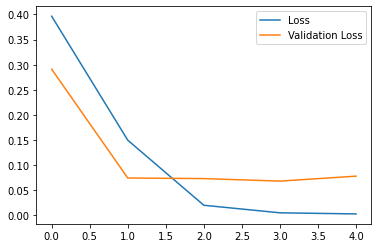

In [39]:
plt.plot(r.history['loss'], label ='Loss')
plt.plot(r.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

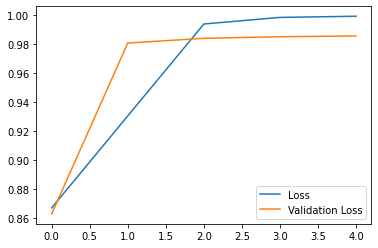

In [40]:
plt.plot(r.history['accuracy'], label ='Loss')
plt.plot(r.history['val_accuracy'], label = 'Validation Loss')
plt.legend()
plt.show